<a href="https://colab.research.google.com/github/vigneshSs-07/MongodB/blob/main/Generating_Heatmap_using_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas  
import pandas as pd
import geoplot
import folium
import matplotlib.pyplot as plt
%matplotlib inline 
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
collisions = geopandas.read_file(geoplot.datasets.get_path('nyc_injurious_collisions'))

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
path = "/volcano_data_2010.csv"
df1 = pd.read_csv(path)

In [34]:
df1.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,Time,VEI,Agent,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,5023,Stratovolcano,Historical,D1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,1666,Stratovolcano,Historical,D1,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,2552,Complex volcano,Historical,D1,1.0,T,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,538,Stratovolcano,Holocene,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,1784,Stratovolcano,Historical,D1,3.0,NaN,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0


In [35]:
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [36]:
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(df[['Year','Name','Country', 'Latitude', 'Longitude', 'Type']], geometry=geometry)

geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [37]:
df.Type.unique()

array(['Stratovolcano', 'Complex volcano', 'Shield volcano',
       'Subglacial volcano', 'Lava dome', 'Caldera'], dtype=object)

Text(0.5, 1.0, 'Volcanoes')

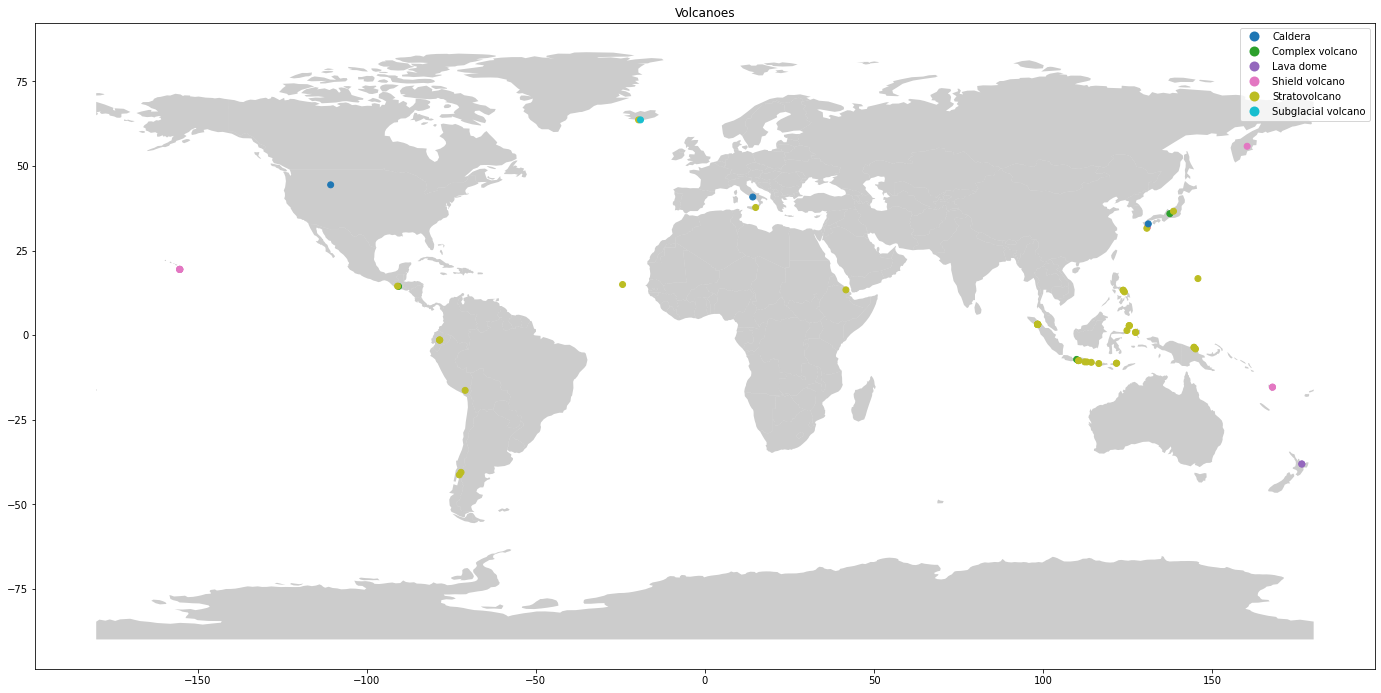

In [38]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='Type', ax=ax, legend=True)
plt.title('Volcanoes')

In [46]:
from folium import plugins

map = folium.Map( location = [15,30],tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

plugins.HeatMap(heat_data).add_to(map)

In [47]:
map